# Property Price Prediction

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import numpy as np


In [2]:
D=pd.read_csv(r"C:\Users\akash\Downloads\Property_Price_Train.csv")             #Loading Dataset
D.head()                                                                     

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
D.shape

(1459, 81)

In [4]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   object 
 3   Lot_Extent                 1200 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   object 
 6   Lane_Type                  91 non-null     object 
 7   Property_Shape             1459 non-null   object 
 8   Land_Outline               1459 non-null   object 
 9   Utility_Type               1459 non-null   object 
 10  Lot_Configuration          1459 non-null   object 
 11  Property_Slope             1459 non-null   object 
 12  Neighborhood               1459 non-null   object 
 13  Condition1                 1459 non-null   objec

In [5]:
D.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type               8
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [6]:
#data cleaning

In [7]:
D.isnull().sum()[D.isnull().sum()>0]

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type           8
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [8]:
len(D.isnull().sum()[D.isnull().sum()>0])

19

In [9]:
D.isnull().sum()[D.isnull().sum()*100/D.shape[0]>50]

Lane_Type                1368
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [10]:
#drop columns because here more than 50% null values in that columns.

In [11]:
D=D.drop(['Lane_Type','Pool_Quality','Fence_Quality','Miscellaneous_Feature'],axis=1)

In [12]:
D.shape

(1459, 77)

In [13]:
D.isnull().sum()[D.isnull().sum()>0]

Lot_Extent            259
Brick_Veneer_Type       8
Brick_Veneer_Area       8
Basement_Height        37
Basement_Condition     37
Exposure_Level         38
BsmtFinType1           37
BsmtFinType2           38
Electrical_System       1
Fireplace_Quality     689
Garage                 81
Garage_Built_Year      81
Garage_Finish_Year     81
Garage_Quality         81
Garage_Condition       81
dtype: int64

In [14]:
#replacing null values

In [15]:
D.Lot_Extent =D.Lot_Extent.fillna(D.Lot_Extent.mean())   

#for continuous data we use mean of that columns for replacing null values in that column.

In [16]:
D.Brick_Veneer_Type.value_counts()

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: Brick_Veneer_Type, dtype: int64

In [17]:
D.Brick_Veneer_Type =D.Brick_Veneer_Type .fillna('None')

#for categorical data we use mode/median(most repeated values) of that columns for replacing null values in that column.

In [18]:
D.Brick_Veneer_Area=D.Brick_Veneer_Area.fillna(D.Brick_Veneer_Area.mean())

In [19]:
D.Basement_Height.value_counts()

TA    648
Gd    618
Ex    121
Fa     35
Name: Basement_Height, dtype: int64

In [20]:
D.Basement_Height = D.Basement_Height.fillna('TA')

In [21]:
D.Basement_Condition.value_counts()

TA    1310
Gd      65
Fa      45
Po       2
Name: Basement_Condition, dtype: int64

In [22]:
D.Basement_Condition=D.Basement_Condition.fillna('TA')

In [23]:
D.Exposure_Level.value_counts()

No    952
Av    221
Gd    134
Mn    114
Name: Exposure_Level, dtype: int64

In [24]:
D.Exposure_Level  = D.Exposure_Level.fillna('No')

In [25]:
D.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    147
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [26]:
D.BsmtFinType1=D.BsmtFinType1.fillna('Unf')

In [27]:
D.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      45
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [28]:
D.BsmtFinType2 =D.BsmtFinType2.fillna('Unf')

In [29]:
D.Electrical_System.value_counts()

SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical_System, dtype: int64

In [30]:
D.Electrical_System=D.Electrical_System.fillna('SBrkr')

In [31]:
D.Fireplace_Quality.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: Fireplace_Quality, dtype: int64

In [32]:
D.Fireplace_Quality=D.Fireplace_Quality.fillna('Gd')

In [33]:
D.Garage.value_counts()

Attchd     869
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2TFes        5
2Types       1
Name: Garage, dtype: int64

In [34]:
D.Garage=D.Garage.fillna('Attchd')

In [35]:
D.Garage_Built_Year=D.Garage_Built_Year.fillna(D.Garage_Built_Year.mean())

In [36]:
D.Garage_Finish_Year.value_counts()

Unf    605
RFn    422
Fin    351
Name: Garage_Finish_Year, dtype: int64

In [37]:
D.Garage_Finish_Year=D.Garage_Finish_Year.fillna('Unf')

In [38]:
D.Garage_Quality.value_counts()

TA    1310
Fa      48
Gd      14
Ex       3
Po       3
Name: Garage_Quality, dtype: int64

In [39]:
D.Garage_Quality=D.Garage_Quality.fillna('TA')

In [40]:
D.Garage_Condition.value_counts()

TA    1325
Fa      35
Gd       9
Po       7
Ex       2
Name: Garage_Condition, dtype: int64

In [41]:
D.Garage_Condition=D.Garage_Condition.fillna('TA')

In [42]:
D.isnull().sum()

Id                           0
Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinT

# label Encoder (data preprocessing)

labelencoder is used to convert categorical variable into numberical format because machine learning models only understand numerical data.

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le=LabelEncoder()

In [45]:
D[D.select_dtypes(include=['object']).columns]=D[D.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [46]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Id                         1459 non-null   int64  
 1   Building_Class             1459 non-null   int64  
 2   Zoning_Class               1459 non-null   int32  
 3   Lot_Extent                 1459 non-null   float64
 4   Lot_Size                   1459 non-null   int64  
 5   Road_Type                  1459 non-null   int32  
 6   Property_Shape             1459 non-null   int32  
 7   Land_Outline               1459 non-null   int32  
 8   Utility_Type               1459 non-null   int32  
 9   Lot_Configuration          1459 non-null   int32  
 10  Property_Slope             1459 non-null   int32  
 11  Neighborhood               1459 non-null   int32  
 12  Condition1                 1459 non-null   int32  
 13  Condition2                 1459 non-null   int32

# sampling

In [83]:
from sklearn.model_selection import train_test_split

In [122]:
D=df1  #when we are removing outliers then store that data in original dataname and run it from here again.

In [123]:
D_train,D_test=train_test_split(D,test_size=0.2)

In [124]:
D_train_y=D_train.iloc[:,-1]
D_test_y=D_test.iloc[:,-1]

In [125]:
D_train_x=D_train.iloc[:,0:76]
D_test_x=D_test.iloc[:,0:76]

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
reg=LinearRegression()

In [128]:
reg.fit(D_train_x,D_train_y)   #fit function is used to start the training of our model.

LinearRegression()

# Rsquare

In [129]:
Rsquare=reg.score(D_train_x,D_train_y)
Rsquare

0.8839854545056617

In [130]:
reg.coef_

array([-7.63130986e-01, -6.23513258e+01, -3.39275755e+03,  5.71978517e+01,
        3.91705923e-01,  2.83053484e+04, -3.76384486e+02,  2.11059475e+03,
        1.11766028e-08,  4.51276244e+01,  4.58610764e+03,  5.58812007e+01,
       -1.91698424e+02, -1.03363519e+04, -1.54982781e+03, -7.97391376e+02,
        9.48952348e+03,  5.39897014e+03,  2.06524587e+02,  1.25975786e+02,
        1.52920875e+02,  1.47521051e+03, -6.55724666e+02,  4.87281894e+02,
        1.43427184e+03,  1.24947829e+01, -2.55461844e+03,  4.33834538e+02,
        4.10159626e+03, -5.10170954e+03,  1.10538478e+03, -2.15201116e+03,
       -6.99294673e+01,  5.65764930e+00,  1.49001034e+03,  1.47265636e+01,
       -4.51128198e+00,  1.58729309e+01, -1.86631364e+03, -7.66709940e+02,
        1.21289229e+02, -5.65332297e+02,  1.87009822e+01,  2.36991083e+01,
       -2.05123509e+01,  2.18877396e+01,  4.58078487e+03, -2.80609243e+03,
        1.97418865e+02, -1.70833991e+03, -1.89367986e+03, -1.18266860e+04,
       -5.20870301e+03,  

In [131]:
reg.intercept_

174254.54169331945

In [132]:
D_train_x.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type',
       'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1',
       'Condition2', 'House_Type', 'House_Design', 'Overall_Material',
       'House_Condition', 'Construction_Year', 'Remodel_Year', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Brick_Veneer_Area', 'Exterior_Material', 'Exterior_Condition',
       'Foundation_Type', 'Basement_Height', 'Basement_Condition',
       'Exposure_Level', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Total_Basement_Area', 'Heating_Type',
       'Heating_Quality', 'Air_Conditioning', 'Electrical_System',
       'First_Floor_Area', 'Second_Floor_Area', 'LowQualFinSF',
       'Grade_Living_Area', 'Underground_Full_Bathroom',
       'Underground_Half_Bathroom', 'Full_Bathroom_Above_Grade',
       'Half_Bathroom_A

# Adj Rsquare

In [133]:
N = D_train_x.shape[0]
N

1116

In [134]:
k=D_train_x.shape[1]
k

76

In [135]:
adjRsq= 1-(1-Rsquare) *(N-1) / (N-k-1)
adjRsq

0.8754993087332172

# MSE

In [136]:
Pred_train=reg.predict(D_train_x)

In [137]:
Pred_test=reg.predict(D_test_x)
Pred_test

array([194184.95696934, 190327.84462726, 153988.25650591, 146455.41258628,
       211890.87076513, 109414.36389135, 105724.53880588, 186551.94552958,
       222156.85335327, 185007.94545416, 186186.60950183, 133799.78109893,
        97283.37635627, 146351.10129354, 187804.89086948, 210931.39150759,
       117636.0424503 , 177336.76737491, 188623.52634109, 221148.30395934,
       122981.61923727, 214808.00898463, 128593.56309063, 156237.60721396,
       198288.99837819, 154668.31531086, 265224.66973499, 195148.88858738,
       208430.59410038, 205506.99867633, 120005.73186509, 193660.79074149,
       208355.0461765 , 182046.5534243 , 152564.30390987, 229034.46442936,
       161604.645575  , 174064.03650838, 187492.97614523, 163971.0843708 ,
        19186.17176356, 118217.69418925, 121231.71969341, 106725.03701785,
       122444.87599556, 229810.35204693, 137736.92480886, 118929.9452715 ,
       225274.16935542, 201269.73291576, 201407.36493165, 146531.77121693,
       171042.61965093, 2

In [138]:
Err_test= D_test_y - Pred_test

In [139]:
Mse=np.mean(np.square(Err_test))
Mse

1282568156.2936723

# RMSE

In [140]:
Rmse=np.sqrt(Mse)
Rmse

35812.96073063036

# MAPE

In [141]:
Mape=np.mean(np.abs(Err_test*100/D_test_y))
Mape

11.333235931647335

In [142]:
100-11.333235931647335

88.66676406835266

In [143]:
#conclusion = My model is having 88.66% accuracy.

In [144]:
#lets check the assumptions.
#we are going to check assumptions on the train data .

In [145]:
Err_train=D_train_y-Pred_train

In [146]:
np.mean(Err_train)

-4.361923550352401e-10

In [147]:
#Erros should be nomally distributed.


In [148]:
import matplotlib.pyplot as plt

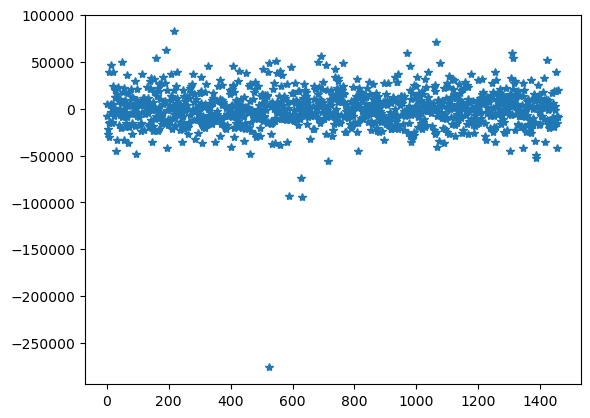

In [149]:
plt.plot(Err_train,'*')

In [150]:
#conclusion=Homosedacity is present.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,
          1.,   8.,  56., 309., 464., 208.,  51.,  14.,   2.]),
 array([-276049.02357892, -258132.18686402, -240215.35014912,
        -222298.51343421, -204381.67671931, -186464.84000441,
        -168548.00328951, -150631.16657461, -132714.32985971,
        -114797.49314481,  -96880.65642991,  -78963.81971501,
         -61046.98300011,  -43130.14628521,  -25213.30957031,
          -7296.47285541,   10620.36385949,   28537.20057439,
          46454.03728929,   64370.87400419,   82287.71071909]),
 <BarContainer object of 20 artists>)

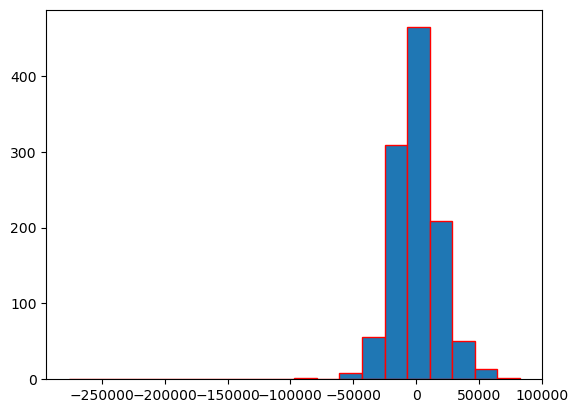

In [151]:
plt.hist(Err_train,bins=20,edgecolor='r')

In [152]:
#conclusion=Erros are nomally distributed.

In [153]:
pred_actual_df=pd.DataFrame()

In [154]:
pred_actual_df['Actual']=D_train_y
pred_actual_df['Predicted']=Pred_train


In [155]:
pred_actual_df

,Actual,Predicted
282,207500,200503.375952
98,83000,73409.649598
205,180500,191393.694849
165,127500,105601.151072
254,145000,137079.698061
391,215000,223382.672618
162,220000,229933.822824
311,132000,140305.659226
328,214500,168840.996983
170,128500,109899.078921


In [156]:
import seaborn as sns 

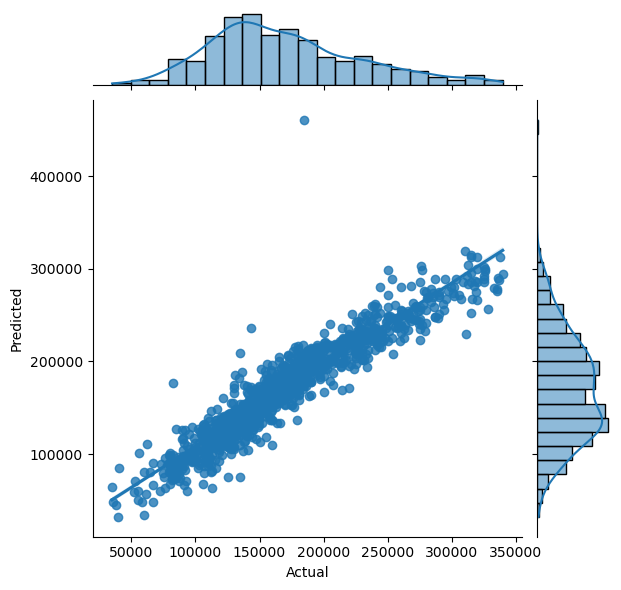

In [157]:
sns.jointplot(x='Actual',y='Predicted',data=pred_actual_df,kind='reg')

# for removing outliers

In [120]:

def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x > mean- k *sd)]
    final_list=[x for x in final_list if (x < mean + k *sd)]
    df1=df.loc[df[col].isin(final_list)];print(df1.shape)
    print('Number of Outliers removed --->',df.shape[0]-df1.shape[0])

In [121]:
remove_outliers(D,'Sale_Price' ,2)

(1396, 77)
Number of Outliers removed ---> 63
